# Exploration of Clustering within Smell Labels

Imports and loading data

In [43]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import SpectralBiclustering

## Spectral Clustering (Binary)

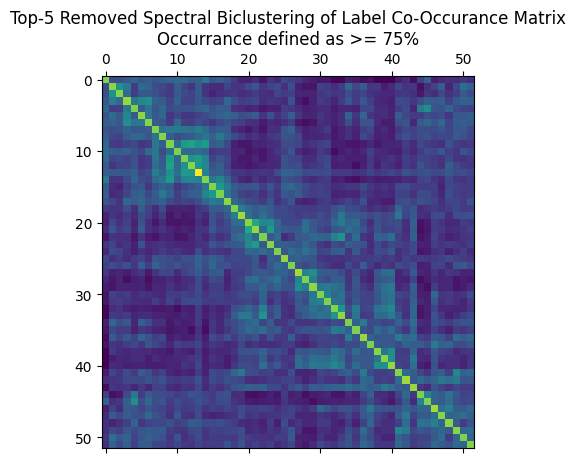

In [44]:
label_df = pd.read_csv("../dataset/processed/task_labels.csv")
label_df = label_df.drop(columns = ["stimulus", "Task1","Task2_single","Task2_mix", "rata", "Intensity"])

# create a co-occurrance matrix with threshold at the 3rd quantile
thresh = label_df.quantile(q = 0.75)
occurrances = (label_df >= thresh).astype(int)
co_occurrance = occurrances.T @ occurrances

# perform spectral clustering to retrieve information on the co-occurrance matrix

clustered_labels = SpectralBiclustering(n_clusters=7).fit(np.array(co_occurrance))
reordered_co_occur= np.array(co_occurrance)[np.argsort(clustered_labels.row_labels_)]

reordered_labels = label_df.loc[:, label_df.columns[np.argsort(clustered_labels.row_labels_)]]
reordered_thresh = label_df.quantile(q = 0.75)
reordered_occurrances = (label_df >= thresh).astype(int)
reordered_co_occur= reordered_occurrances.T @ reordered_occurrances

plt.matshow(reordered_co_occur)
plt.title("Top-5 Removed Spectral Biclustering of Label Co-Occurance Matrix\nOccurrance defined as >= 75%")
plt.show()

## Remove most influential 5

In [45]:
rating_means = pd.DataFrame(label_df.mean(axis = 0))
rating_means = rating_means.sort_values(by=0, ascending=False)
display(rating_means.iloc[0:10])
print(min(label_df.max(axis = 1)))

,0
Pleasantness,5.006887
Sweet,0.816283
Fruity,0.537010
Musty,0.430917
Green,0.374767
Herbal,0.357104
Floral,0.310858
Grainy,0.292331
Medicinal,0.285744
Alcoholic,0.284615


2.2


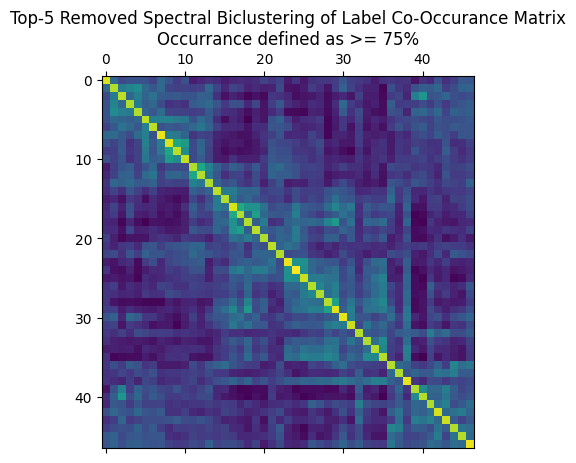

In [46]:
label_df = label_df.drop(columns = ["Pleasantness", "Sweet", "Fruity", "Musty", "Green"])

# create a co-occurrance matrix with threshold at the 3rd quantile
thresh = label_df.quantile(q = 0.7)
occurrances = (label_df >= thresh).astype(int)
co_occurrance = occurrances.T @ occurrances

# perform spectral clustering to retrieve information on the co-occurrance matrix

clustered_labels = SpectralBiclustering(n_clusters=7).fit(np.array(co_occurrance))
reordered_co_occur= np.array(co_occurrance)[np.argsort(clustered_labels.row_labels_)]

reordered_labels = label_df.loc[:, label_df.columns[np.argsort(clustered_labels.row_labels_)]]
reordered_thresh = label_df.quantile(q = 0.75)
reordered_occurrances = (label_df >= thresh).astype(int)
reordered_co_occur= reordered_occurrances.T @ reordered_occurrances

plt.matshow(reordered_co_occur)
plt.title("Top-5 Removed Spectral Biclustering of Label Co-Occurance Matrix\nOccurrance defined as >= 75%")
plt.show()

Note that our data is non-binary, is there a better way to do this?

## Correlation Matrix (Top 2 removed)

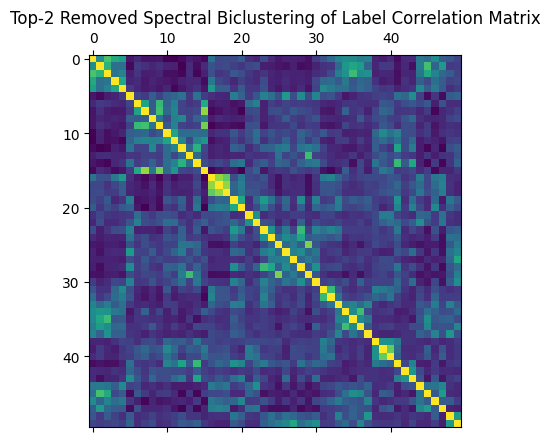

,0
0,Sulfurous
1,Cheesy
2,Rotten.Decay
3,Garlic.Onion
4,Meaty
5,Ozone
6,Peach
7,Berry
8,Citrus
9,Tropical


In [47]:
# perform spectral clustering to retrieve information on the covariance matrix

label_df = pd.read_csv("../dataset/processed/task_labels.csv")
label_df = label_df.drop(columns = ["stimulus", "Task1","Task2_single","Task2_mix", "rata", "Intensity"])
label_df = label_df.drop(columns = ["Pleasantness", "Sweet"])

# create a correlation matrix 
corr_matrix = np.corrcoef(np.array(label_df).T)

# perform spectral clustering to retrieve information on the correlation matrix
clustered_labels = SpectralBiclustering(n_clusters=10, n_init = 100).fit(corr_matrix)
reordered_corr = corr_matrix[np.argsort(clustered_labels.row_labels_)]

reordered_labels = label_df.loc[:, label_df.columns[np.argsort(clustered_labels.row_labels_)]]
reordered_corr = np.corrcoef(np.array(reordered_labels).T)
plt.matshow(reordered_corr)
plt.title("Top-2 Removed Spectral Biclustering of Label Correlation Matrix")
plt.show()

label_clarity = pd.DataFrame(label_df.columns[np.argsort(clustered_labels.row_labels_)])
display(label_clarity)

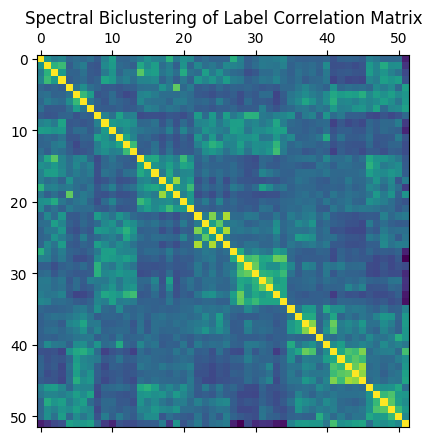

In [48]:
# None removed

label_df = pd.read_csv("../dataset/processed/task_labels.csv")
label_df = label_df.drop(columns = ["stimulus", "Task1","Task2_single","Task2_mix", "rata", "Intensity"])

# create a correlation matrix 
corr_matrix = np.corrcoef(np.array(label_df).T)

# perform spectral clustering to retrieve information on the correlation matrix
clustered_labels = SpectralBiclustering(n_clusters=10, n_init = 100).fit(corr_matrix)
reordered_corr = corr_matrix[np.argsort(clustered_labels.row_labels_)]

reordered_labels = label_df.loc[:, label_df.columns[np.argsort(clustered_labels.row_labels_)]]
reordered_corr = np.corrcoef(np.array(reordered_labels).T)
plt.matshow(reordered_corr)
plt.title("Spectral Biclustering of Label Correlation Matrix")
plt.show()


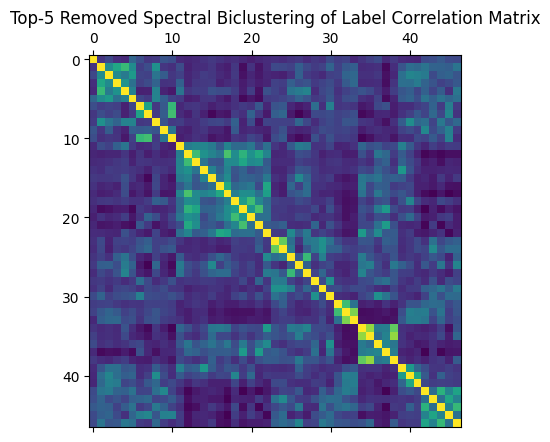

,0
0,Cucumber
1,Plastic
2,Chlorine
3,Phenolic
4,Rubber
5,Ozone
6,Peach
7,Berry
8,Metallic
9,Citrus


In [49]:
# Top 5 removed

label_df = pd.read_csv("../dataset/processed/task_labels.csv")
label_df = label_df.drop(columns = ["stimulus", "Task1","Task2_single","Task2_mix", "rata", "Intensity"])
label_df = label_df.drop(columns = ["Pleasantness", "Sweet", "Fruity", "Musty", "Green"])

# create a correlation matrix 
corr_matrix = np.corrcoef(np.array(label_df).T)

# perform spectral clustering to retrieve information on the correlation matrix
clustered_labels = SpectralBiclustering(n_clusters=7, n_init = 100).fit(corr_matrix)
reordered_corr = corr_matrix[np.argsort(clustered_labels.row_labels_)]

reordered_labels = label_df.loc[:, label_df.columns[np.argsort(clustered_labels.row_labels_)]]
reordered_corr = np.corrcoef(np.array(reordered_labels).T)
plt.matshow(reordered_corr)
plt.title("Top-5 Removed Spectral Biclustering of Label Correlation Matrix")
plt.show()

label_clarity_5_removed = pd.DataFrame(label_df.columns[np.argsort(clustered_labels.row_labels_)])
display(label_clarity_5_removed)

## Word2Vec Analysis via Spacy and PCA

Using the Labels as ordered by the Spectral Biclustered Correlation Matrix with top 2 removed, the following section explores semantic patterns that can be found through the linguistic similarity of the corresponding labels

In [50]:
import spacy

nlp = spacy.load("en_core_web_lg")
word2vec_dict = {}
for column in label_clarity.loc[:,0]:
    if column not in ["stimulus", "Task1","Task2_single","Task2_mix", "rata", "Intensity"]:
        word2vec_dict[column] = nlp(column)

/var/folders/xt/5my4_t657l5dvcsk9ybkb_ww0000gn/T/ipykernel_8751/3772177126.py:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  curr.append(word2vec_dict[label1].similarity(word2vec_dict[label2]))


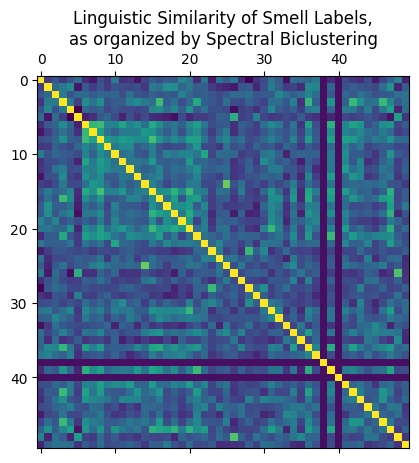

In [51]:
labels = word2vec_dict.keys()
semantic_correlation_mat = []
for label1 in labels:
    curr = []
    for label2 in labels:
        curr.append(word2vec_dict[label1].similarity(word2vec_dict[label2]))
    semantic_correlation_mat.append(curr)
    
plt.matshow(semantic_correlation_mat)
plt.title("Linguistic Similarity of Smell Labels,\nas organized by Spectral Biclustering")
plt.show()